# Stock Market Analysis Data

# Introduction

Analyzing and comparing the stocks performance of Apple, Microsoft, Netflix and Google over a period of three months.

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px

# Reading data

In [2]:
df = pd.read_csv('./Data/stocks.csv')

In [3]:
df.head()

Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000

## Missing values

In [4]:
df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

The data does not seem to have missing values.

## Descriptive Statistics

In [5]:
df.describe()

Open        High         Low       Close   Adj Close  \
count  248.000000  248.000000  248.000000  248.000000  248.000000   
mean   215.252093  217.919662  212.697452  215.381674  215.362697   
std     91.691315   92.863023   90.147881   91.461989   91.454750   
min     89.540001   90.129997   88.860001   89.349998   89.349998   
25%    135.235004  137.440004  134.822495  136.347498  136.347498   
50%    208.764999  212.614998  208.184998  209.920006  209.920006   
75%    304.177505  307.565002  295.437500  303.942505  303.942505   
max    372.410004  373.829987  361.739990  366.829987  366.829987   

             Volume  
count  2.480000e+02  
mean   3.208210e+07  
std    2.233590e+07  
min    2.657900e+06  
25%    1.714180e+07  
50%    2.734000e+07  
75%    4.771772e+07  
max    1.133164e+08

# stock price movements 

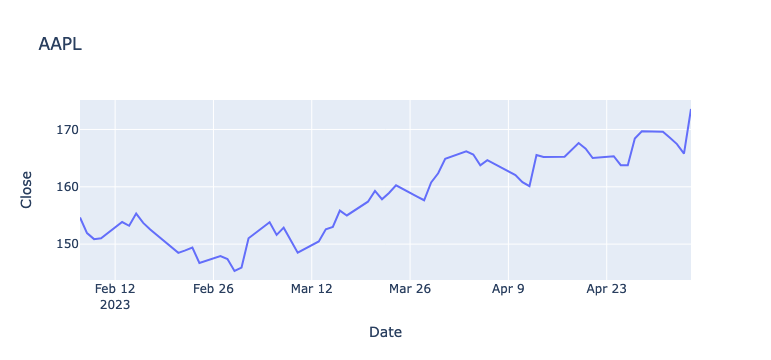

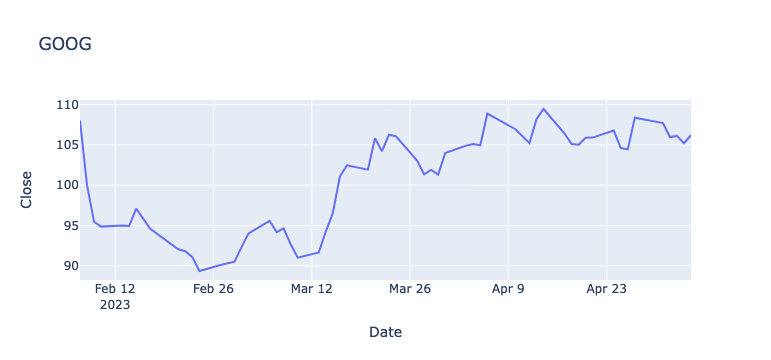

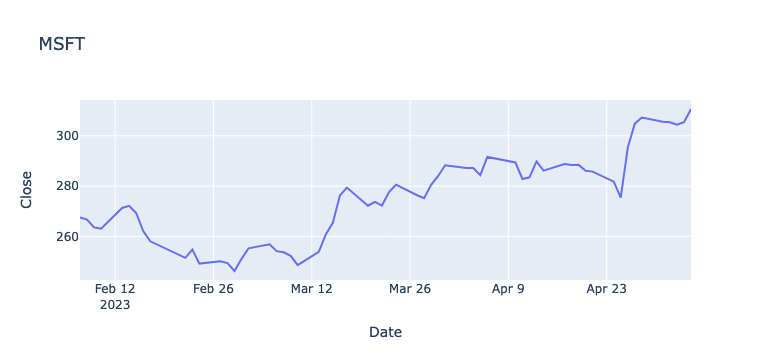

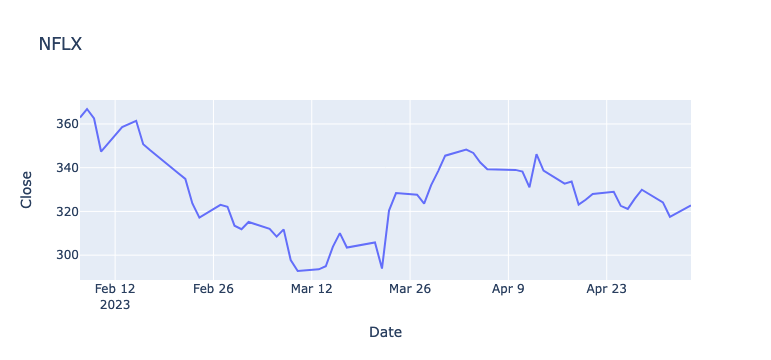

In [6]:
for ticker, group in df.groupby('Ticker'):  
    fig = px.line(group, x='Date', y='Close', 
                  title=f"{ticker} ")
    fig.show()

#### Apple

Between february and may, Apple stocks price have increased.
bullish continual pattern can be seen from february to may, this is identified by the a peak reached by an indicator

#### Google

Between february and may, Google stocks price have decreased.
[Cup and handle](https://www.investopedia.com/terms/c/cupandhandle.asp) continual pattern can be seen from february to may, this is identified by the c shape formed between february and march, and the [flag](https://www.investopedia.com/ask/answers/013015/what-are-main-differences-between-symmetrical-triangle-pattern-and-pennant.asp) from april to may representing the handle.

#### Microsoft

The stock price started off decreasing from the 7 to 28th of february, since then it increased until may. Overrall the stock price increased in the 3 months period. 

#### Netflix

The stock price decreased from 7 feb to march 10 and the a sudden increase between march 22 to april 1st and then decreased again until May.

# Moving averages

Moving averages are commonly used in time series analysis to smooth out the data and identify trends or patterns.

In [7]:
moving_averages = ['MA10','MA20','MA30']

for i in moving_averages:
    ma = int(i[2:])
    df[i] = df.groupby('Ticker')['Close'].rolling(window=ma).mean().reset_index(0, drop=True)

for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[moving_averages])
    

Moving Averages for AAPL
          MA10      MA20        MA30
0          NaN       NaN         NaN
1          NaN       NaN         NaN
2          NaN       NaN         NaN
3          NaN       NaN         NaN
4          NaN       NaN         NaN
..         ...       ...         ...
57  166.631000  165.2730  163.437000
58  166.837999  165.3915  163.808333
59  166.819998  165.4825  164.080666
60  166.733998  165.5840  164.345999
61  167.588998  166.0295  164.834000

[62 rows x 3 columns]
Moving Averages for GOOG
           MA10        MA20        MA30
186         NaN         NaN         NaN
187         NaN         NaN         NaN
188         NaN         NaN         NaN
189         NaN         NaN         NaN
190         NaN         NaN         NaN
..          ...         ...         ...
243  106.209000  106.416500  105.476000
244  106.295000  106.470000  105.611000
245  106.405001  106.520000  105.620334
246  106.336001  106.533001  105.653334
247  106.366500  106.398750  105.651834

[6

### Visualising moving averages

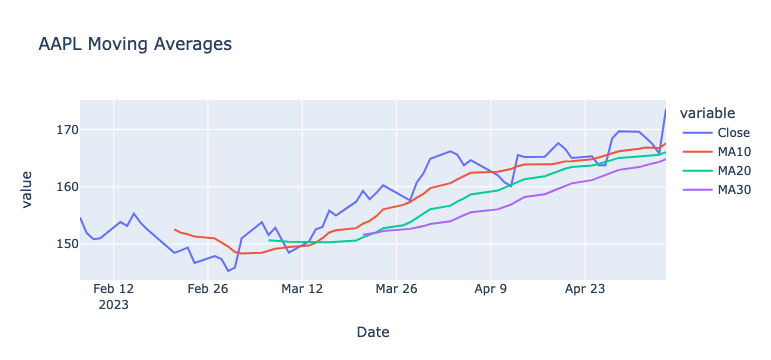

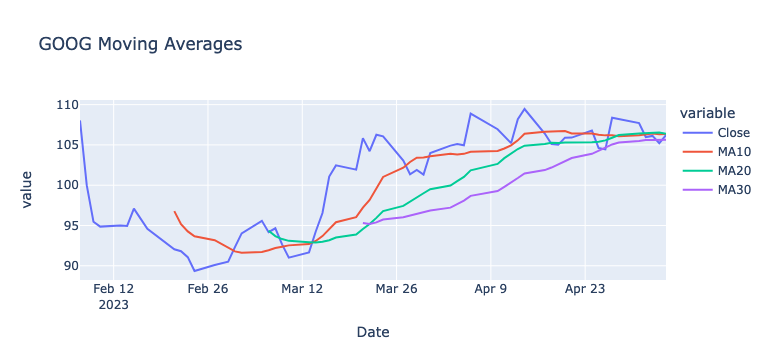

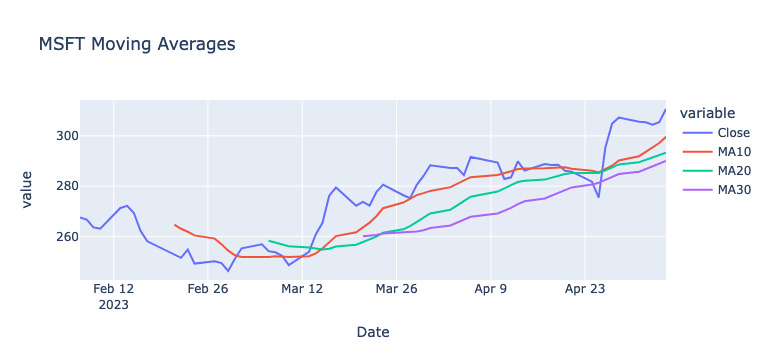

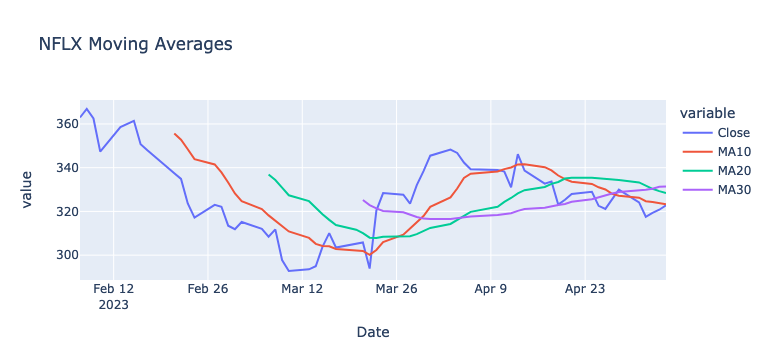

In [8]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA10', 'MA20','MA30'], 
                  title=f"{ticker} Moving Averages")
    
    fig.show()

The 10 day moving average appears to provide a less smooth curve while still following the chart's pattern. As the number of days used in the moving averages rises, the curve becomes shorter and smoother and the pattern's track is lost.

# Volatility

Volatility is the rate at which the price of a stock increases or decreases over a particular period. Higher stock price volatility often means higher risk and helps an investor to estimate the fluctuations that may happen in the future.

In [9]:
df['daily_returns']=(df.groupby('Ticker')['Close'].pct_change())*100

AAPL


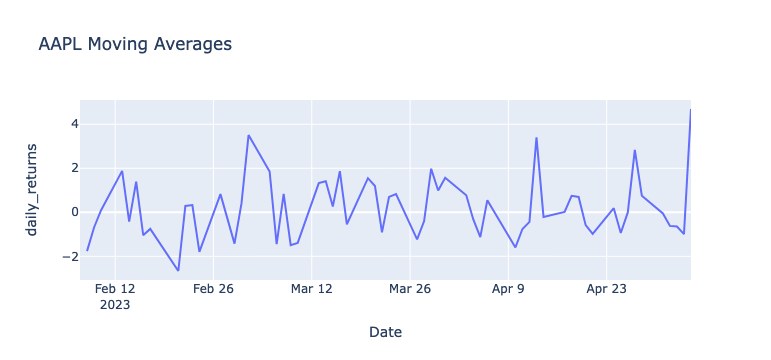

GOOG


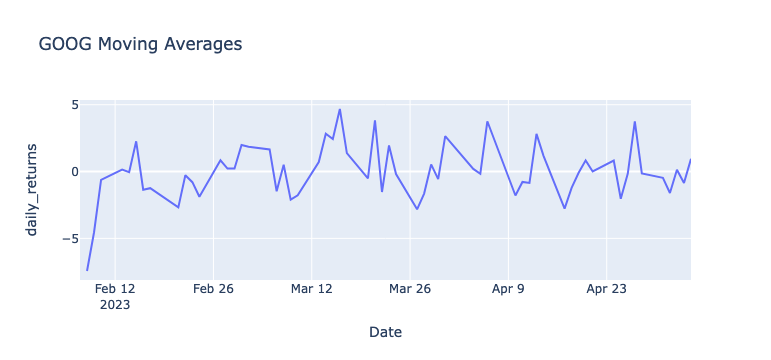

MSFT


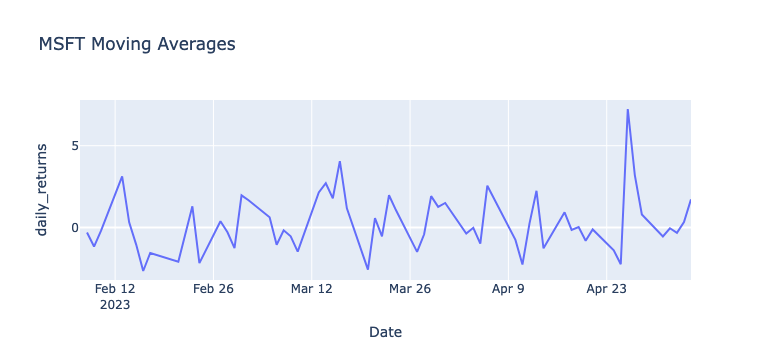

NFLX


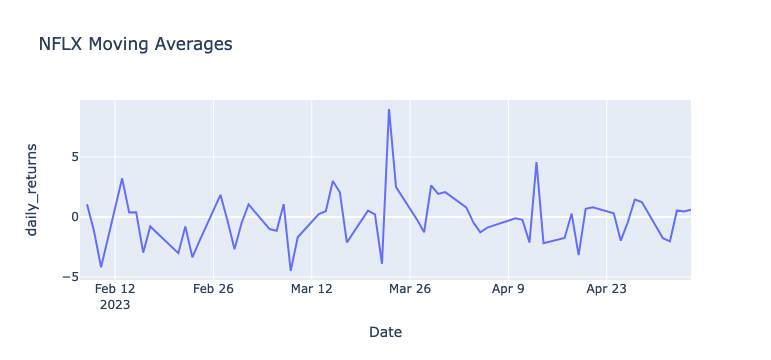

In [10]:
for ticker, group in df.groupby('Ticker'):
    print(ticker)
    fig = px.line(group, x='Date',y='daily_returns', 
                  title=f"{ticker} Moving Averages")
    
    
    fig.show()


## Daily volatility

In [11]:
for ticker,group in df.groupby('Ticker'):
    daily_returns = group['daily_returns'].std()
    print(ticker,f'{round(daily_returns,2)}%')

AAPL 1.42%
GOOG 2.07%
MSFT 1.79%
NFLX 2.25%


The top tech companies appear to have low volatility (daily returns), which indicates they present less risks because they fluctuate less frequently.

# Correlation

In [12]:
df=df.set_index('Date')

In [13]:
ticker_list = df['Ticker'].unique()

for i in ticker_list:
    globals()[i] =df.loc[df['Ticker']==i,['daily_returns']].rename(columns={'daily_returns':i})

In [14]:
df_corr = pd.concat([AAPL, MSFT, NFLX, GOOG],axis=1)

In [15]:
df_corr

AAPL      MSFT      NFLX      GOOG
Date                                              
2023-02-07       NaN       NaN       NaN       NaN
2023-02-08 -1.765274 -0.310206  1.069011 -7.441689
2023-02-09 -0.691155 -1.165979 -1.180380 -4.540001
2023-02-10  0.092795 -0.197249 -4.176556 -0.628534
2023-02-13  1.880678  3.124288  3.227206  0.147585
...              ...       ...       ...       ...
2023-05-01 -0.053039 -0.553281 -1.760979 -0.471264
2023-05-02 -0.619142 -0.049088 -2.027029 -1.606161
2023-05-03 -0.646729 -0.330706  0.551094  0.132100
2023-05-04 -0.991343  0.331803  0.463517 -0.857523
2023-05-05  4.692692  1.715723  0.617249  0.955230

[62 rows x 4 columns]

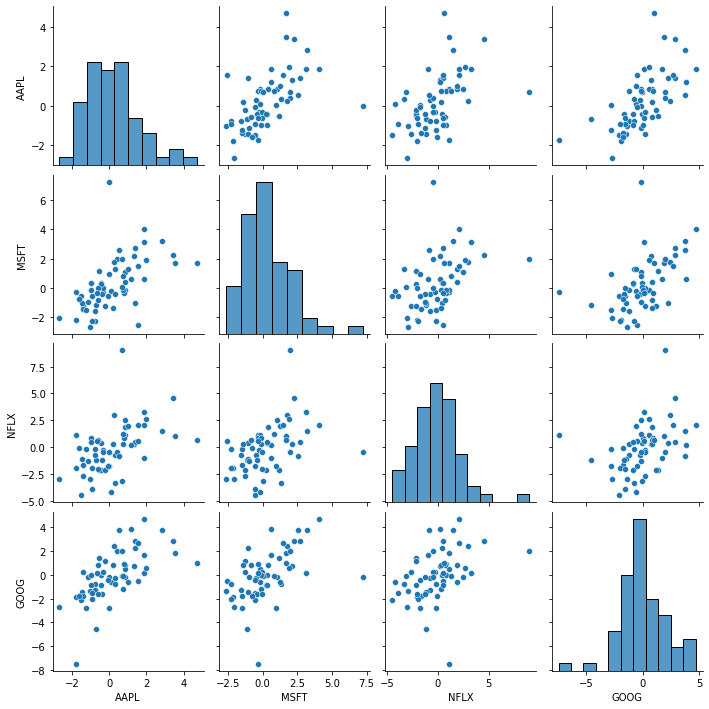

In [16]:
sns.pairplot(df_corr)

The top tech companies have a positive association, with Netflix and Google having a modest correlation while Apple and Google have a large link. Consequently, it would be sensible to invest in each of them similarly.

# Conclusion

The leading IT company stocks for the period of three months have been properly analyzed. They also exhibit a favorable correlation with less fluctuation.